In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'ML-Projects/semantic-cityscapes/'

Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *
import os
from glob import glob

In [0]:
#%%bash
#unzip -q val.zip -d image/
#unzip -q train.zip -d image/
#unzip -q mask.zip -d mask/

## Rename the image files so that mask and images have same name

In [5]:
'''
images = glob(base_dir + 'data/image/**/**/*gtFine_color.png')

for img in images:
  new = img.replace("leftImg8bit.png", "gtFine_labelIds.png")
  os.rename(img,new)
  #print(img)
  '''

'\nimages = glob(base_dir + \'data/image/**/**/*gtFine_color.png\')\n\nfor img in images:\n  new = img.replace("leftImg8bit.png", "gtFine_labelIds.png")\n  os.rename(img,new)\n  #print(img)\n  '

## Get labels

In [0]:
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )

In [0]:
labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

In [8]:
classes=[]
for i in labels:
  classes.append(i.name)
print(classes)

['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 'motorcycle', 'bicycle', 'license plate']


## Prepare data

In [0]:
classes=['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'caravan', 'trailer', 'train', 'motorcycle', 'bicycle', 'license plate']

In [0]:
image_path = Path(base_dir+'data/image')
images = glob(base_dir + 'data/image/**/**/*gtFine_labelIds.png')
masks = glob(base_dir + 'data/mask/**/**/*gtFine_labelIds.png')

In [0]:
img= Path(images[0])

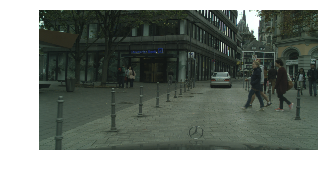

In [12]:
img_show = open_image(img)
img_show.show(figsize=(5,5))

In [0]:
def get_mask(x):
  for img in masks:
    if {Path(img).stem} == {x.stem}:
      return Path(img) 

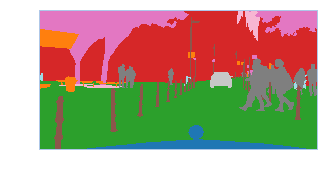

In [14]:
mask = open_mask(get_mask(img))
mask.show(figsize=(5,5), alpha=1)

In [15]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([1024, 2048]), tensor([[[3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3],
          ...,
          [3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3],
          [3, 3, 3,  ..., 3, 3, 3]]]))

In [16]:
size = src_size//2
bs = 8
size, bs

(array([ 512, 1024]), 8)

In [0]:
src = (SegmentationItemList.from_folder(image_path)
       .split_by_folder(train='train', valid='val')
       .label_from_func(get_mask,classes=classes))

In [0]:
data = (src.transform(get_transforms(), size=size//4,tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [19]:
data.c

35

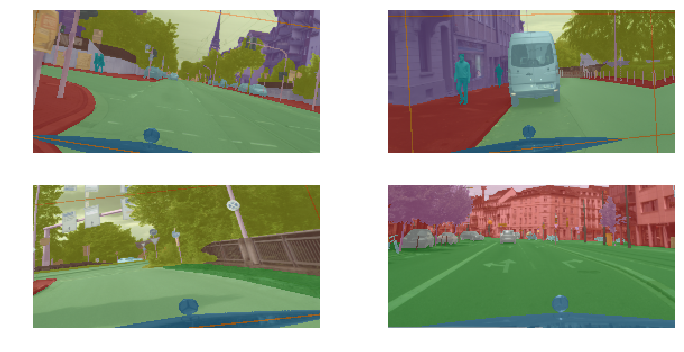

In [20]:
data.show_batch(2, figsize=(10,5))

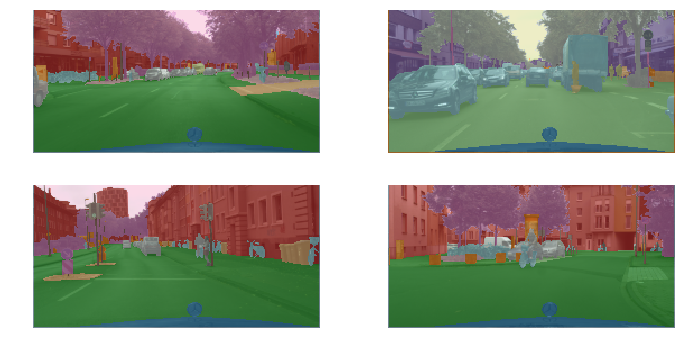

In [21]:
data.show_batch(2, figsize=(10,5), ds_type=DatasetType.Valid)

## Prepare UNet model

In [0]:
name2id = {v:k for k,v in enumerate(classes)}
void_code = name2id['unlabeled']

def acc_cityscapes(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_cityscapes
#metrics=accuracy

In [0]:
learn = unet_learner(data, models.resnet50,metrics=metrics,wd=1e-2)

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


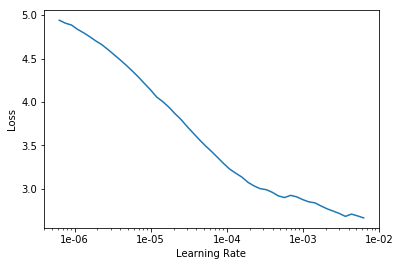

In [26]:
lr_find(learn)
learn.recorder.plot()

In [27]:
lr = 5e-5
learn.fit_one_cycle(12, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_cityscapes,time
0,1.021198,0.994808,0.732677,10:14
1,0.845430,0.842953,0.759505,10:09
2,0.754251,0.768616,0.775945,10:10
3,0.713142,0.723528,0.784210,10:03
4,0.648351,0.685701,0.794529,10:07
5,0.623422,0.640683,0.799937,10:11
6,0.599235,0.614773,0.809110,10:10
7,0.579504,0.634986,0.806324,10:08
8,0.561421,0.622056,0.807564,10:07
9,0.544096,0.590924,0.816639,10:13


In [0]:
learn.save('res50-1')

In [34]:
learn.load('res50-1')

Learner(data=ImageDataBunch;

Train: LabelList (2975 items)
x: SegmentationItemList
Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256)
y: SegmentationLabelList
ImageSegment (1, 128, 256),ImageSegment (1, 128, 256),ImageSegment (1, 128, 256),ImageSegment (1, 128, 256),ImageSegment (1, 128, 256)
Path: /content/gdrive/My Drive/ML-Projects/semantic-cityscapes/data/image;

Valid: LabelList (500 items)
x: SegmentationItemList
Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256),Image (3, 128, 256)
y: SegmentationLabelList
ImageSegment (1, 128, 256),ImageSegment (1, 128, 256),ImageSegment (1, 128, 256),ImageSegment (1, 128, 256),ImageSegment (1, 128, 256)
Path: /content/gdrive/My Drive/ML-Projects/semantic-cityscapes/data/image;

Test: None, model=DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, 

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


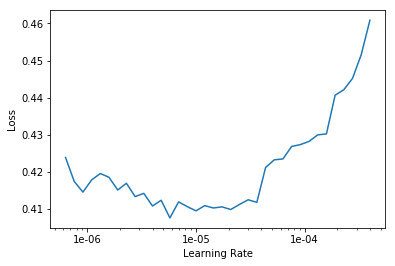

In [36]:
lr_find(learn)
learn.recorder.plot()

In [37]:
lr2 = 5e-6
learn.fit_one_cycle(12, slice(lr2), pct_start=0.8)

epoch,train_loss,valid_loss,acc_cityscapes,time
0,0.419174,0.523958,0.835238,11:01
1,0.422226,0.528169,0.834812,11:00
2,0.413685,0.531910,0.835656,10:59
3,0.399689,0.530466,0.835250,10:59
4,0.417813,0.526216,0.836710,11:00
5,0.417119,0.525131,0.835963,11:00
6,0.403175,0.535369,0.837766,11:00
7,0.405127,0.531737,0.836888,10:59
8,0.414978,0.516549,0.837310,11:00
9,0.394773,0.534366,0.836380,11:00


In [0]:
learn.save('res50-2')

In [0]:
learn.load('res34-1')

In [0]:
learn.unfreeze()

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lrs = slice(lr/400,lr/4)

In [0]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

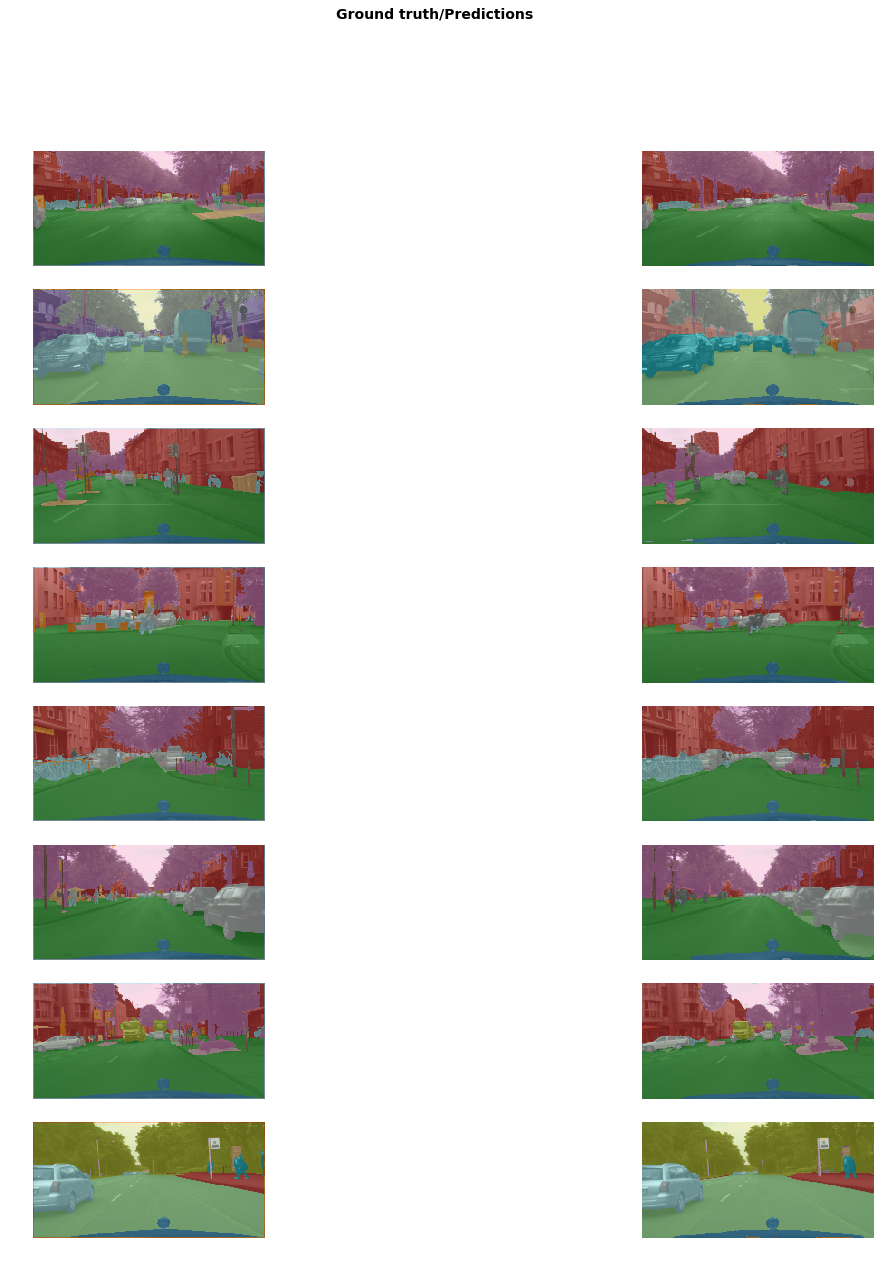

In [44]:
learn.show_results(rows=10, figsize=(20,20))